In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

## Reading Dataset

In [2]:
df=pd.read_csv("loan.csv")
df.head(2)

C:\Users\bhardwaj.nitish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(39717, 111)

# Data Cleaning

### Checking Null Values

In [4]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# checking for null values
for i in df:
    if df[i].isnull().sum()>1:
        val=df[i].isnull().mean()
        print("{} value is {}:- ".format(i,val))

emp_title value is 0.06191303472064859:- 
emp_length value is 0.027066495455346576:- 
desc value is 0.3258050708764509:- 
title value is 0.00027695948838029054:- 
mths_since_last_delinq value is 0.6466248709620566:- 
mths_since_last_record value is 0.9298537150338646:- 
revol_util value is 0.0012589067653649571:- 
last_pymnt_d value is 0.001787647606818239:- 
next_pymnt_d value is 0.971296925749679:- 
last_credit_pull_d value is 5.0356270614598286e-05:- 
collections_12_mths_ex_med value is 0.0014099755772087519:- 
mths_since_last_major_derog value is 1.0:- 
annual_inc_joint value is 1.0:- 
dti_joint value is 1.0:- 
verification_status_joint value is 1.0:- 
tot_coll_amt value is 1.0:- 
tot_cur_bal value is 1.0:- 
open_acc_6m value is 1.0:- 
open_il_6m value is 1.0:- 
open_il_12m value is 1.0:- 
open_il_24m value is 1.0:- 
mths_since_rcnt_il value is 1.0:- 
total_bal_il value is 1.0:- 
il_util value is 1.0:- 
open_rv_12m value is 1.0:- 
open_rv_24m value is 1.0:- 
max_bal_bc value is 1.0

In [6]:
# There are so many null values lets drop whose mean/percent is greater than 80%
for i in df:
    if df[i].isnull().mean()>.80:
        df.drop(i,axis=1,inplace=True)

In [7]:
# Lets check again for miss values
for i in df:
    if df[i].isnull().sum()>1:
        val=df[i].isnull().mean()
        print("{} value is {}:- ".format(i,val))

emp_title value is 0.06191303472064859:- 
emp_length value is 0.027066495455346576:- 
desc value is 0.3258050708764509:- 
title value is 0.00027695948838029054:- 
mths_since_last_delinq value is 0.6466248709620566:- 
revol_util value is 0.0012589067653649571:- 
last_pymnt_d value is 0.001787647606818239:- 
last_credit_pull_d value is 5.0356270614598286e-05:- 
collections_12_mths_ex_med value is 0.0014099755772087519:- 
chargeoff_within_12_mths value is 0.0014099755772087519:- 
pub_rec_bankruptcies value is 0.017549160309187503:- 
tax_liens value is 0.0009819472769846665:- 


In [8]:
# Lets check for issing values along the rows
row_miss=df.loc[df.isnull().sum(axis=1)>5]
row_miss.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,NaN,< 1 year,NONE,100000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I took a high interest loan from Citibank in 2...,other,Refinancing high interest loan,950xx,CA,15.0,0,May-99,1,NaN,6,0,8155,14.90%,8,f,0.0,0.0,4622.489229,2224.58,4000.0,622.49,0.0,0.0,0.0,Sep-10,129.76,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,NaN,< 1 year,NONE,120000.0,Not Verified,Aug-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The family is expanding in October and we are ...,other,Baby is coming,024xx,MA,15.0,0,May-99,1,NaN,6,0,8155,14.90%,8,f,0.0,0.0,3191.218575,1852.05,2800.0,391.22,0.0,0.0,0.0,Sep-10,89.80,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


### In here not more than 5 rows are null in a row

### Lets separate categorial values to numeric

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
df["tax_liens"].dtype

dtype('float64')

In [11]:
#cat_miss_val=[feature for feature in df.columns if feature in df[feature].select_dtypes(include="object")]
cat_feat=[feature for feature in df.columns if df[feature].dtype=="O"]
cat_feat

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [12]:
df[cat_feat].head(2)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL


### Lets separate date columns as well

In [13]:
date_col=[feature for feature in cat_feat if "_d" in  feature or feature in ["earliest_cr_line"]]
date_col

['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

## Lets check the content of these categorial variable

In [35]:
cat_feat=[i for i in cat_feat if i  not in date_col]
df[cat_feat].head(3)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,revol_util,initial_list_status,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,83.70%,f,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,9.40%,f,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,98.50%,f,INDIVIDUAL


## for Numeric

In [15]:
#num_feat=[feature for feature in df.columns if feature in df.select_dtypes(exclude="object")]
#num_feat
num_feat=[i for i in df.columns if df[i].dtype in ["int64","float64"]]

#Using Alternate way

# Using fuction
# def num_feature():
#     num_feat=list()
#     for i in df.columns:
#         if df[i].dtype != "O":
#             val=i
#             num_feat.append(val)
#     return num_feat
len(num_feat)

32

## Lets separate contionus and discrete variable as well

In [17]:
len(df["delinq_2yrs"].unique())

11

In [19]:
dis_feat=[i for i in num_feat if len(df[i].unique())<20]
df[dis_feat].head(3)

,delinq_2yrs,inq_last_6mths,pub_rec,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1,0,0.0,1,0,0.0,0,0.0,0.0
1,0,5,0,0.0,1,0,0.0,0,0.0,0.0
2,0,2,0,0.0,1,0,0.0,0,0.0,0.0


In [20]:
# lets check for discere values for feature i doubt have null or 0 values
for i in dis_feat:
    val=df[i].unique()
    print("{}:- {}".format(i,val))

delinq_2yrs:- [ 0  2  3  1  4  6  5  8  7  9 11]
inq_last_6mths:- [1 5 2 0 3 4 6 7 8]
pub_rec:- [0 1 2 3 4]
collections_12_mths_ex_med:- [ 0. nan]
policy_code:- [1]
acc_now_delinq:- [0]
chargeoff_within_12_mths:- [ 0. nan]
delinq_amnt:- [0]
pub_rec_bankruptcies:- [ 0.  1.  2. nan]
tax_liens:- [ 0. nan]


In [21]:
# since "collections_12_mths_ex_med","policy_code","acc_now_delinq",chargeoff_within_12_mths","delinq_amnt",tax_liens" have 0 values we can remove them also
df.drop(["collections_12_mths_ex_med","policy_code","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"],axis=1,inplace=True)

In [26]:
# We dont need id as well "memberid" lets get rid of it as well
df.drop(["id","member_id"],axis=1,inplace=True)
num_feat=[i for i in df.columns if df[i].dtype in ["int64","float64"]]
dis_feat=[i for i in num_feat if len(df[i].unique())<20]
df[dis_feat].head()

,delinq_2yrs,inq_last_6mths,pub_rec,pub_rec_bankruptcies
0,0,1,0,0.0
1,0,5,0,0.0
2,0,2,0,0.0
3,0,1,0,0.0
4,0,0,0,0.0


# Continous features

In [28]:
cont_feat=[i for i in num_feat if i not in dis_feat]
df[cont_feat].head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,162.87,24000.0,27.65,NaN,3,13648,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,59.83,30000.0,1.00,NaN,3,1687,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,84.33,12252.0,8.72,NaN,2,2956,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,339.31,49200.0,20.00,35.0,10,5598,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000,3000,3000.0,67.79,80000.0,17.94,38.0,15,27783,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79


# Date columns
Notice date columns contains _d name in column

In [36]:
df[date_col].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,May-16
1,Dec-11,Apr-99,Apr-13,Sep-13
2,Dec-11,Nov-01,Jun-14,May-16
3,Dec-11,Feb-96,Jan-15,Apr-16
4,Dec-11,Jan-96,May-16,May-16


### Extract month and year from the "Issue_d" column

In [38]:
from datetime import datetime
df["issue_d"]=df["issue_d"].apply(lambda x:datetime.strptime(x,"%b-%y"))


In [39]:
df[date_col].head(2)

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,Jan-85,Jan-15,May-16
1,2011-12-01,Apr-99,Apr-13,Sep-13


In [40]:
# Extractinng year and Month
df["issue_month"]=df["issue_d"].apply(lambda x:x.month)
df["issue_year"]=df["issue_d"].apply(lambda x:x.year)
df[["issue_year","issue_month"]].head()

,issue_year,issue_month
0,2011,12
1,2011,12
2,2011,12
3,2011,12
4,2011,12


# Data Cleaning

In [41]:
# first check for categorial vaiables
df[cat_feat].head(2)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,revol_util,initial_list_status,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,83.70%,f,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,9.40%,f,INDIVIDUAL


In [42]:
# lets remove % from int rate
df["int_rate"]=[i[0:-1] for i in df["int_rate"]]

In [43]:
df["int_rate"]=df["int_rate"].apply(lambda x:pd.to_numeric(x))
df["int_rate"].dtype

dtype('float64')

In [44]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [53]:
#lets check for "emp_length" as well

# also, lets extract the numeric part from the variable employment length

# first, Impute the missing value with mode

df['emp_length'].fillna("10+ years",inplace=True)
# using regular expression to extract numeric values from the string

import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numericdf['emp_length'].value_counts()
df['emp_length']=df['emp_length'].apply(lambda x:pd.to_numeric(x))

In [54]:
df['emp_length'].value_counts()

10    9954
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [55]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [56]:
# In here Loan_status is ore predictyed variable we are only intersted in "fully_paid" and "Charged off" lets remove  "CURRENT"
loan=df.copy()

In [57]:
loan=loan[loan["loan_status"]!="Current"]

In [58]:
loan["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [59]:
# Change Fully Paid to 0 and Charged Off to 1
loan["loan_status"]=np.where(loan["loan_status"]=="Charged Off",1,0)
loan["loan_status"].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

# EDA

In [60]:
#lets start with categorial variables
loan[cat_feat].head(2)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,revol_util,initial_list_status,application_type
0,36 months,10.65,B,B2,NaN,10,RENT,Verified,0,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,83.70%,f,INDIVIDUAL
1,60 months,15.27,C,C4,Ryder,1,RENT,Source Verified,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,9.40%,f,INDIVIDUAL


<function matplotlib.pyplot.show(close=None, block=None)>

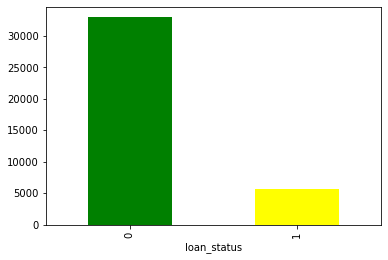

In [61]:
# Check how many have charged off and how many fully paid
c = ['green', 'yellow', 'black', 'blue', 'orange']
loan.groupby("loan_status")["loan_status"].count().plot.bar(color=c)
plt.show

In [62]:
# lets check the defalut rate
loan["loan_status"].mean()

0.14586411592399617

### Default rate is 14.5%

## Lets check for term

<AxesSubplot:xlabel='term', ylabel='loan_status'>

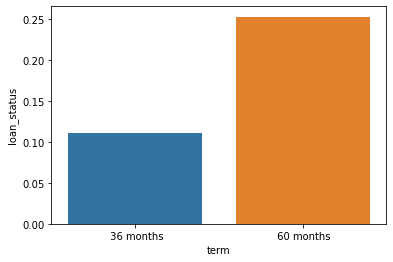

In [63]:
sns.barplot(x="term",y="loan_status",data=loan,ci=None)

### 60 months loan takers have charged offf more

# Grade

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

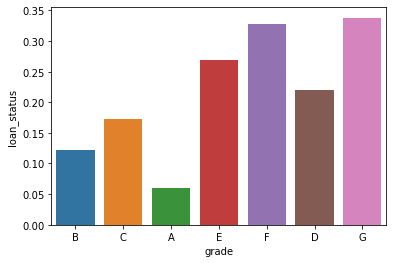

In [64]:
sns.barplot(x="grade",y="loan_status",data=loan,ci=None)

### Grade "E","F","G" charged off more

# sub_grade

<AxesSubplot:xlabel='loan_status', ylabel='sub_grade'>

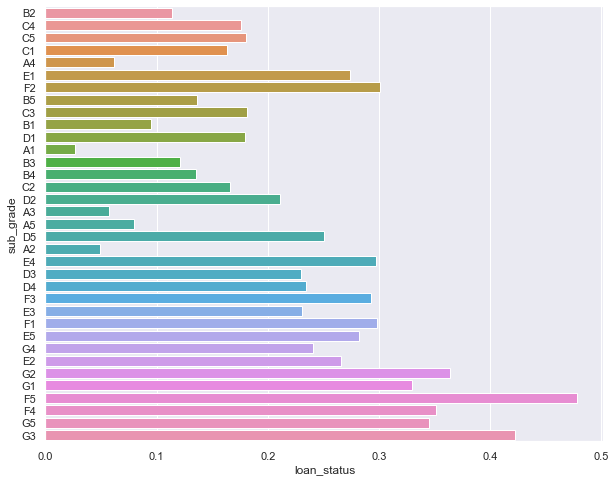

In [65]:
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(y="sub_grade",x="loan_status",data=loan,ci=None)

#### Sub_grade "F5" will charge off more

# EMP_LENGTH

<AxesSubplot:xlabel='emp_length', ylabel='loan_status'>

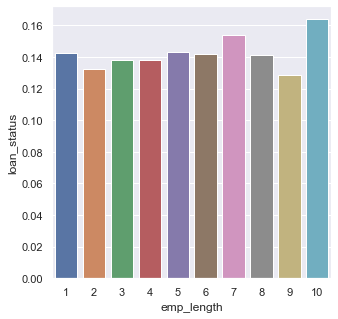

In [66]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x="emp_length",y="loan_status",data=loan,ci=None)

# home_ownership

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

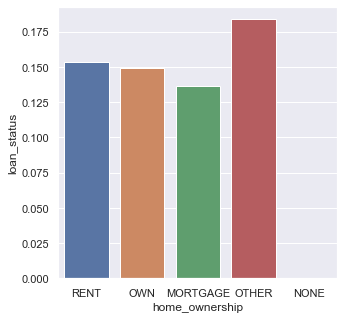

In [67]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x="home_ownership",y="loan_status",data=loan,ci=None)

#### Other will charge off more

# verification_status

<AxesSubplot:xlabel='verification_status', ylabel='loan_status'>

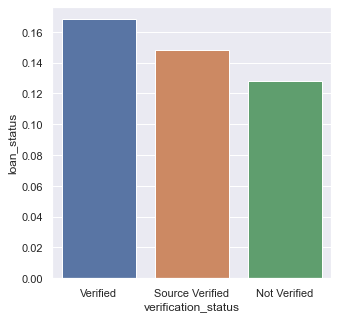

In [68]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x="verification_status",y="loan_status",data=loan,ci=None)

## Verified one will charged off more

# Purpose

<AxesSubplot:xlabel='loan_status', ylabel='purpose'>

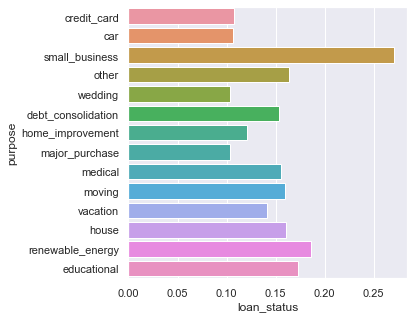

In [69]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x="loan_status",y="purpose",data=loan,ci=None)

## Small business will charge off more

# addr_state

<AxesSubplot:xlabel='loan_status', ylabel='addr_state'>

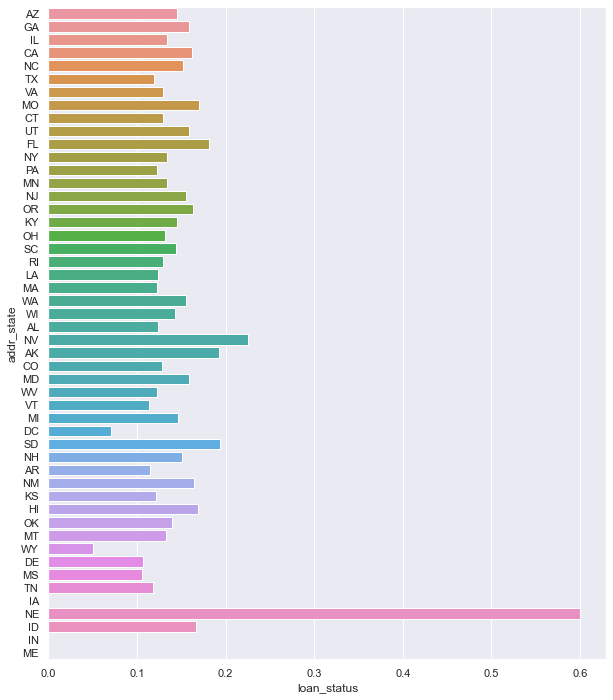

In [70]:
sns.set(rc={"figure.figsize":(10,12)})
sns.barplot(x="loan_status",y="addr_state",data=loan,ci=None)

#### NE state will charge off more

# Date_columns

In [71]:
total_dt_col=[i for i in loan.columns if i in date_col or i in loan[["issue_month","issue_year"]]]
loan[total_dt_col].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,issue_month,issue_year
0,2011-12-01,Jan-85,Jan-15,May-16,12,2011
1,2011-12-01,Apr-99,Apr-13,Sep-13,12,2011
2,2011-12-01,Nov-01,Jun-14,May-16,12,2011
3,2011-12-01,Feb-96,Jan-15,Apr-16,12,2011
5,2011-12-01,Nov-04,Jan-15,Jan-16,12,2011


<AxesSubplot:xlabel='issue_year'>

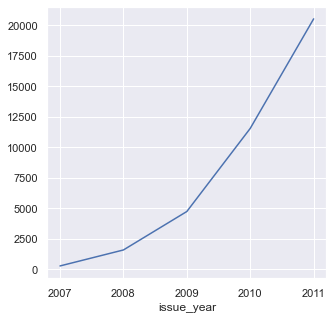

In [72]:
sns.set(rc={"figure.figsize":(5,5)})
loan.groupby("issue_year")["issue_year"].count().plot()

## Notice each year the number of loan is increasing

<AxesSubplot:xlabel='issue_year', ylabel='loan_status'>

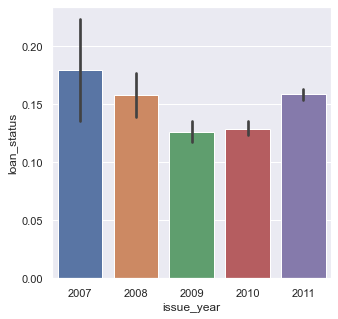

In [73]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x="issue_year",y="loan_status",data=loan)

### People in 2007 have charged off more and gradully increasing after 2009

<AxesSubplot:xlabel='issue_month'>

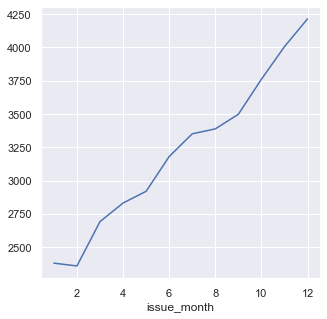

In [74]:
#Lets check for month also
sns.set(rc={"figure.figsize":(5,5)})
loan.groupby("issue_month")["issue_month"].count().plot()

### Dec month have highest loan

<AxesSubplot:xlabel='issue_month', ylabel='loan_status'>

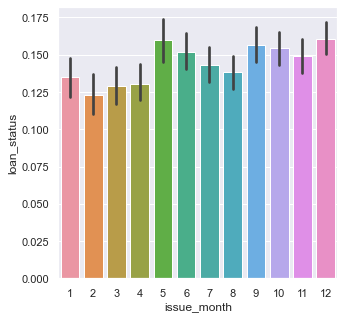

In [75]:
sns.set(rc={"figure.figsize":(5,5)})
sns.barplot(x="issue_month",y="loan_status",data=loan)

# For Continous Variables

In [78]:
loan[cont_feat].head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,162.87,24000.0,27.65,NaN,3,13648,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,59.83,30000.0,1.00,NaN,3,1687,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,84.33,12252.0,8.72,NaN,2,2956,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,339.31,49200.0,20.00,35.0,10,5598,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
5,5000,5000,5000.0,156.46,36000.0,11.20,NaN,9,7963,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03


# Loan_amount

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

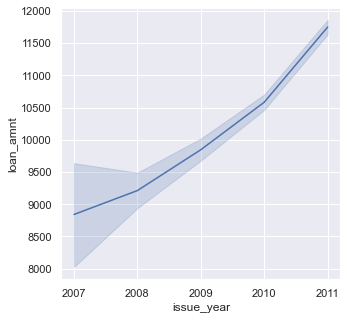

In [79]:
sns.set(rc={"figure.figsize":(5,5)})
sns.lineplot(x="issue_year",y="loan_amnt",data=loan)

## Loan amount is increasing with years

## funded_amnt

<AxesSubplot:xlabel='issue_year', ylabel='funded_amnt'>

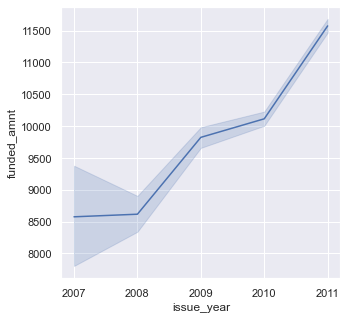

In [80]:
sns.set(rc={"figure.figsize":(5,5)})
sns.lineplot(x="issue_year",y="funded_amnt",data=loan)

# revol_bal

<AxesSubplot:xlabel='issue_year', ylabel='revol_bal'>

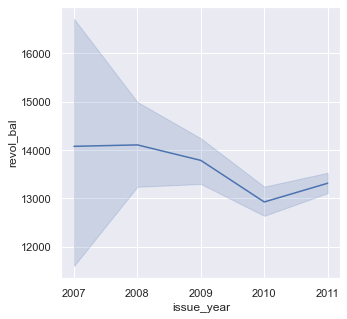

In [81]:
sns.set({"figure.figsize":(5,5)})
sns.lineplot(x="issue_year",y="revol_bal",data=loan)

# How to do group by 2 variables

In [ ]:
loan.groupby(['delinq_2yrs','loan_status'])["loan_status"].count()

In [ ]:
sns.countplot(x="delinq_2yrs",hue="loan_status",data=loan)

## Diff between Count plot and Barplot 
    *barplot is basically used to aggregate the categorical data according to some methods and by default its the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x axis and a numerical column for the y axis and we see that it creates a plot taking a mean per categorical column.
    * sns.countplot() on the other hand shows us the count of each category using bars.A countplot basically counts the categories and returns a count of their occurrences

# BARPLOT
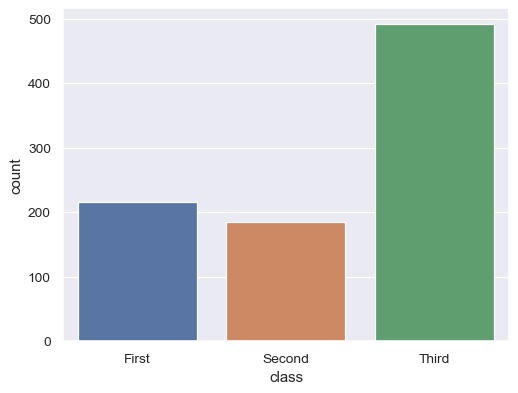

# COUNTPLOT
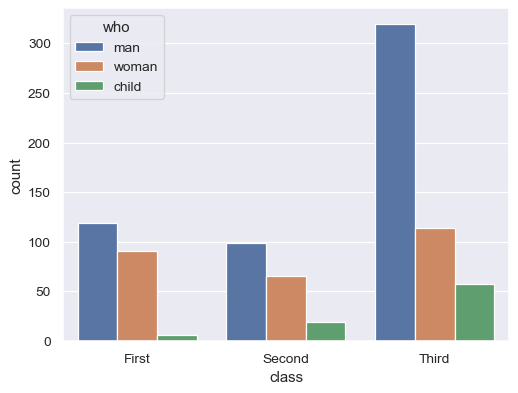

# open_acc

<AxesSubplot:xlabel='issue_year', ylabel='open_acc'>

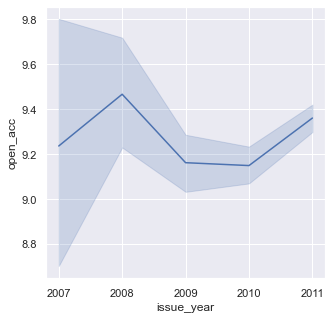

In [82]:
sns.lineplot(x="issue_year",y="open_acc",data=loan)

# total_acc

<AxesSubplot:xlabel='issue_year', ylabel='total_acc'>

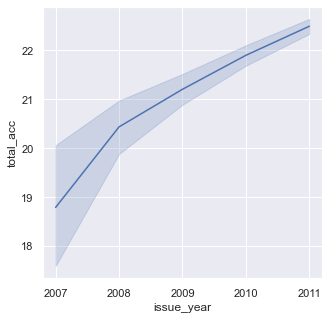

In [83]:
sns.lineplot(x="issue_year",y="total_acc",data=loan)

In [85]:
df[cont_feat].head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,162.87,24000.0,27.65,NaN,3,13648,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,59.83,30000.0,1.00,NaN,3,1687,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,84.33,12252.0,8.72,NaN,2,2956,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,339.31,49200.0,20.00,35.0,10,5598,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,3000,3000,3000.0,67.79,80000.0,17.94,38.0,15,27783,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79


# Checking outliers in continous features

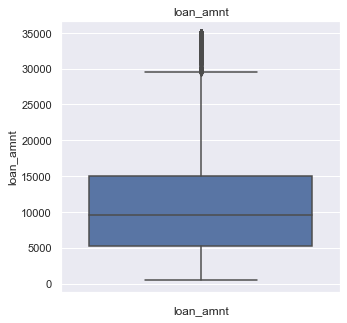

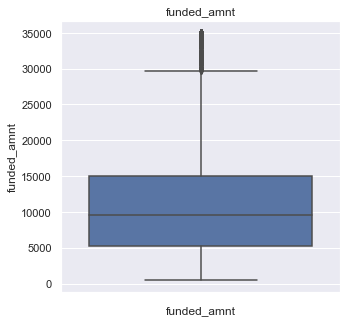

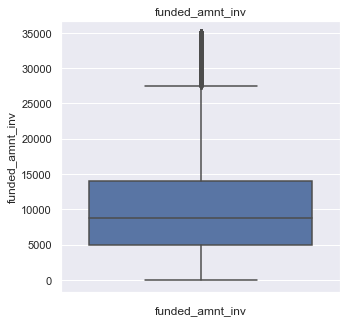

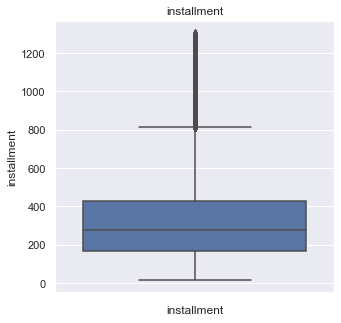

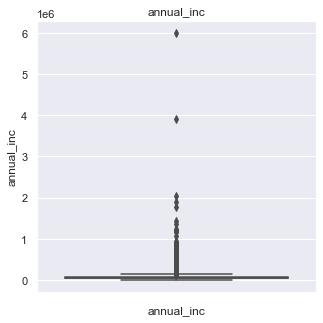

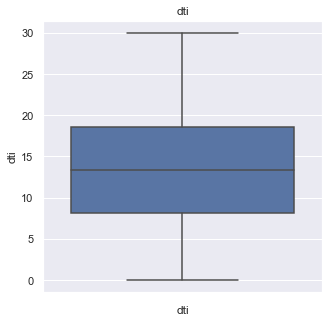

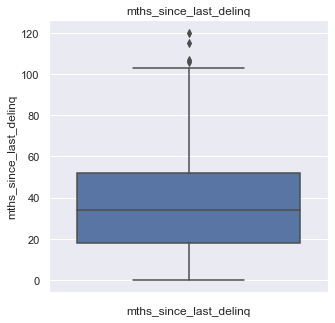

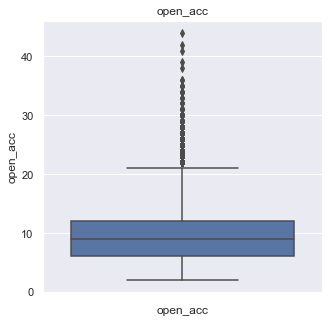

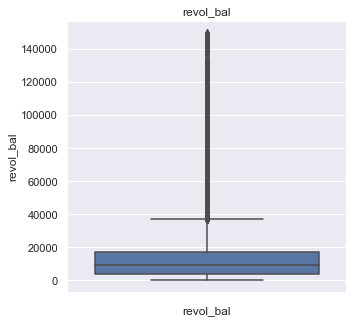

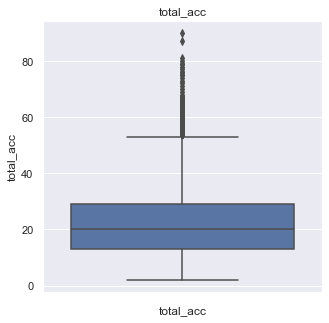

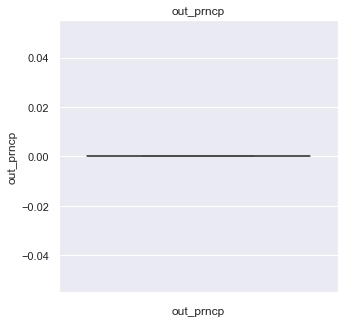

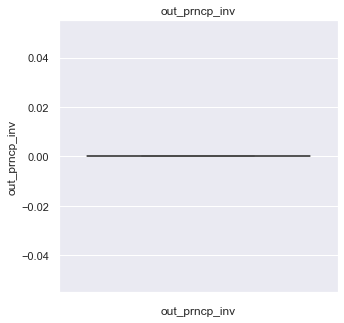

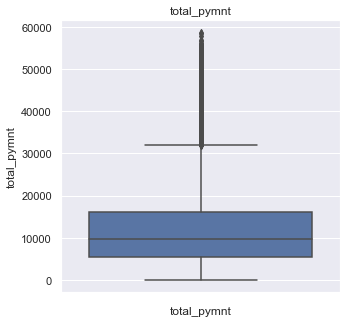

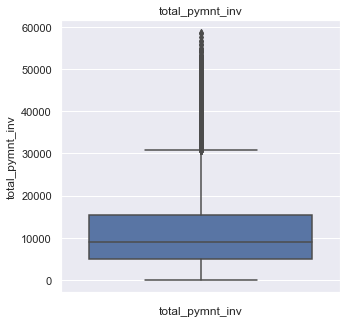

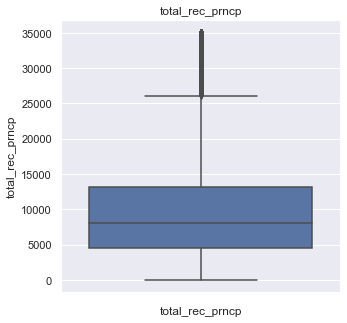

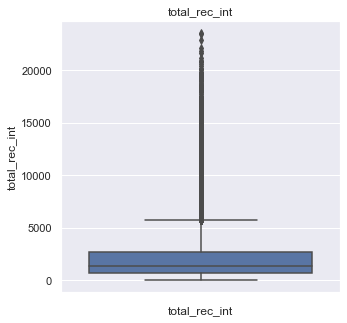

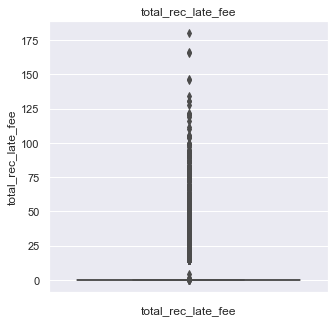

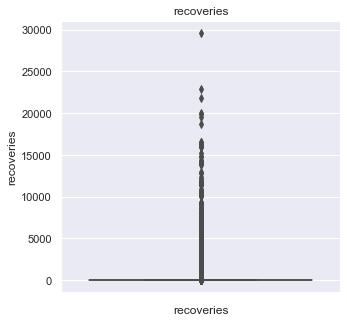

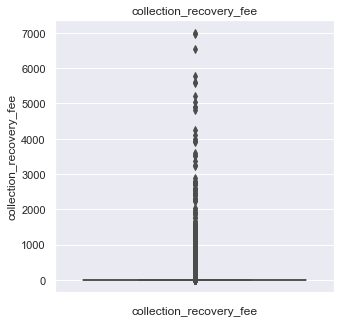

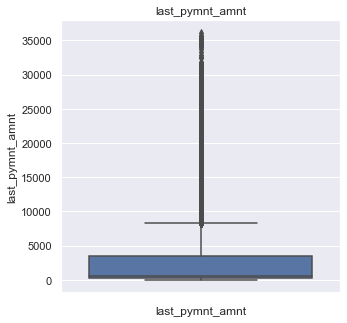

In [86]:
for i in cont_feat:
    sns.boxplot(y=i,data=loan)
    plt.xlabel(i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()
    


In [122]:
# from box plot "out_prncp","out_prncp_inv" have 0 vales lets remove them also
loan.drop(["out_prncp","out_prncp_inv"],axis=1,inplace=True)
df.drop(["out_prncp","out_prncp_inv"],axis=1,inplace=True)

In [123]:
# In contionous variable we find the distribution of the variable
cont_feat=[i for i in cont_feat if i not in ["out_prncp","out_prncp_inv"]]
loan[cont_feat].head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,162.87,24000.0,27.65,NaN,3,13648,9,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62
1,2500,2500,2500.0,59.83,30000.0,1.00,NaN,3,1687,4,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66
2,2400,2400,2400.0,84.33,12252.0,8.72,NaN,2,2956,10,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,649.91


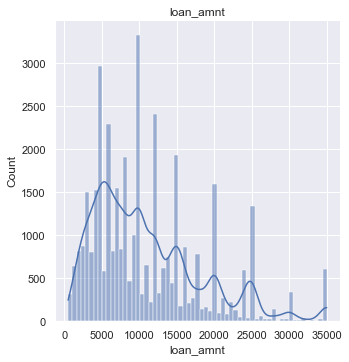

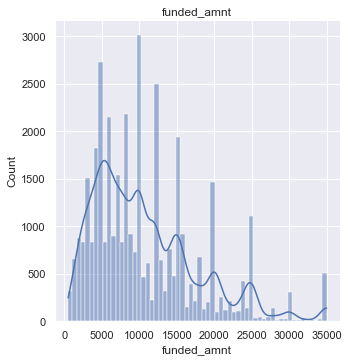

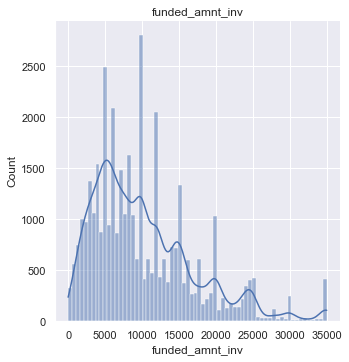

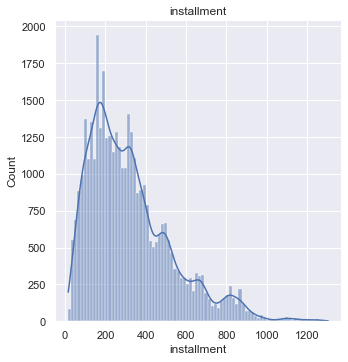

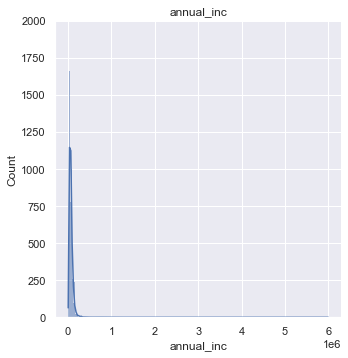

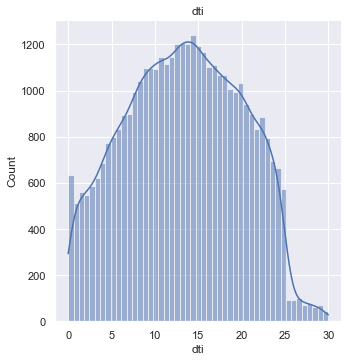

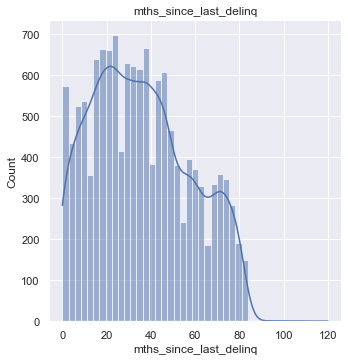

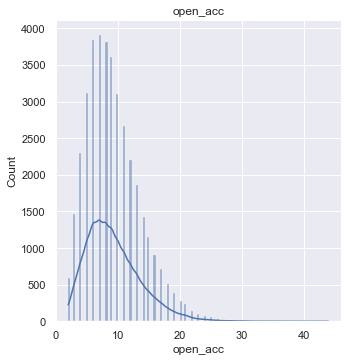

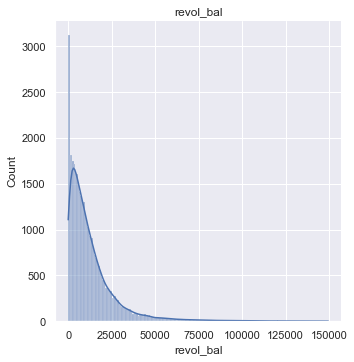

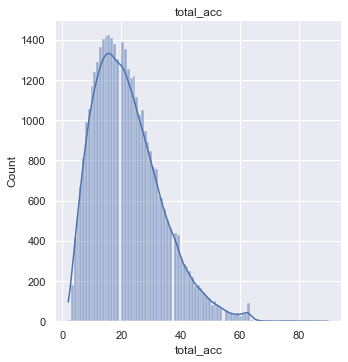

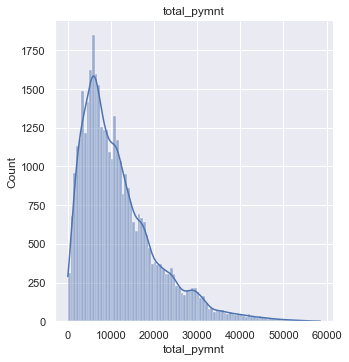

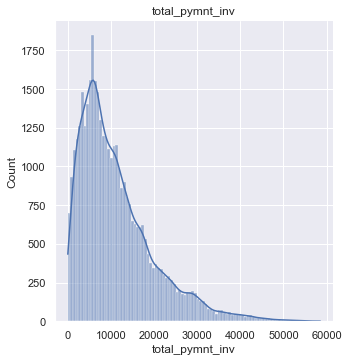

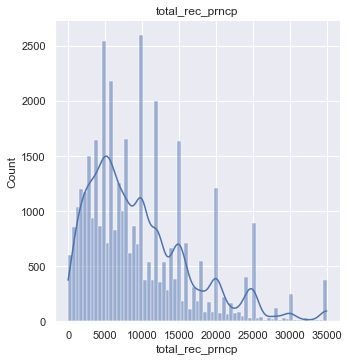

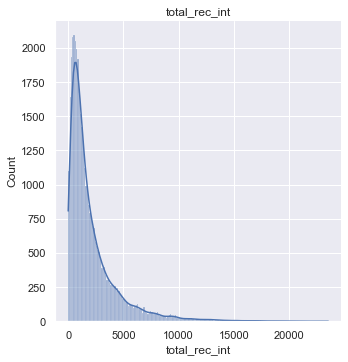

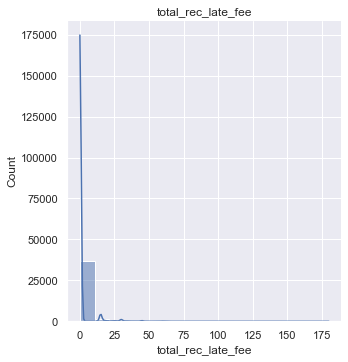

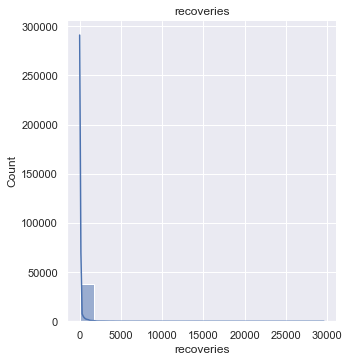

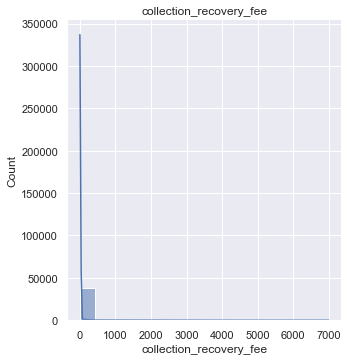

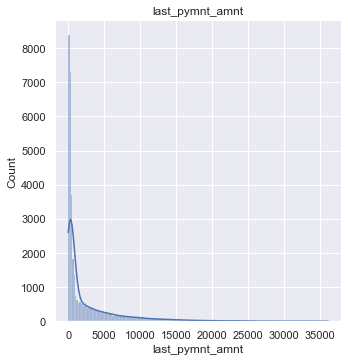

In [127]:
for feature in cont_feat:
    data=loan.copy()
    sns.displot(data, x=feature,kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


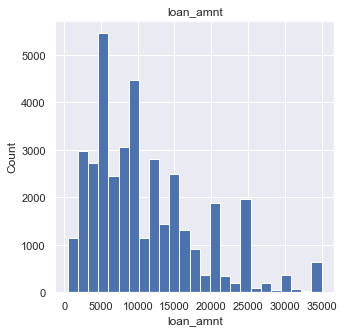

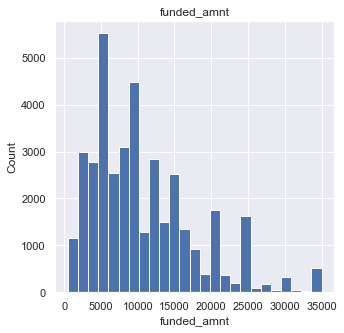

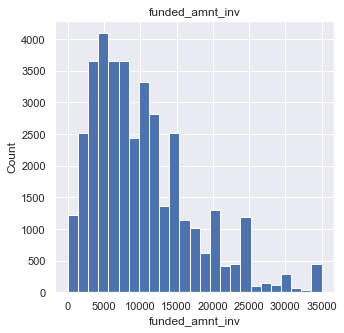

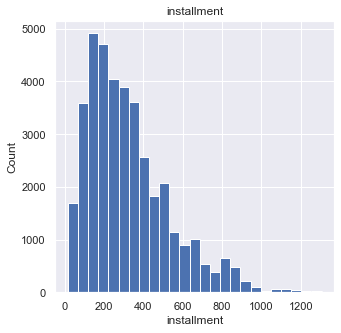

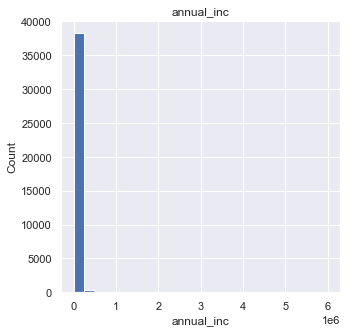

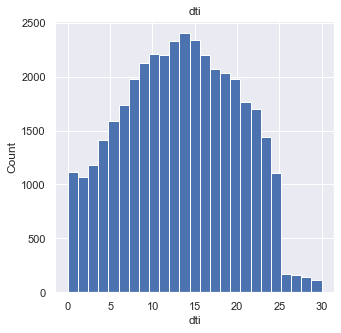

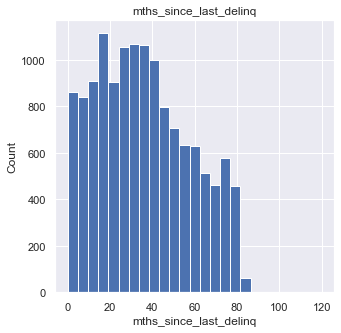

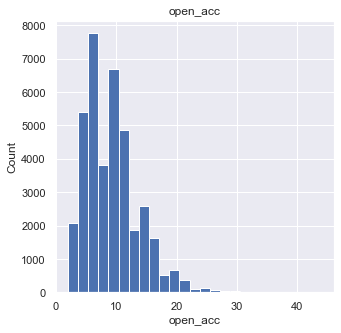

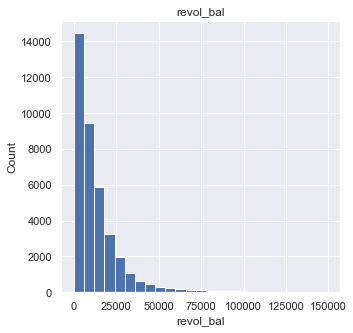

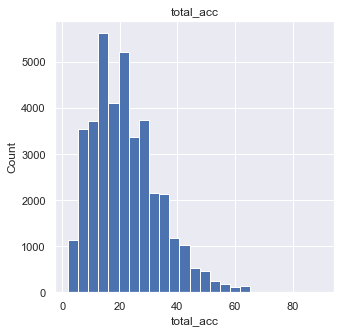

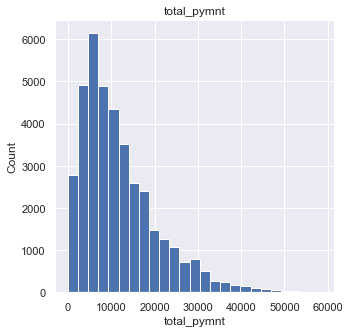

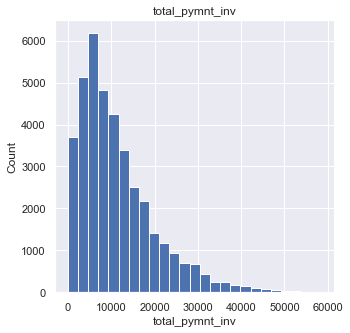

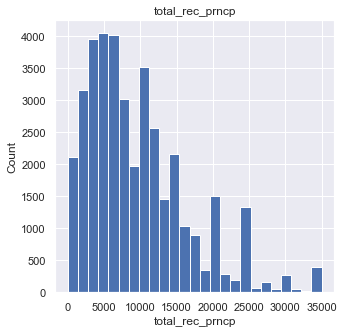

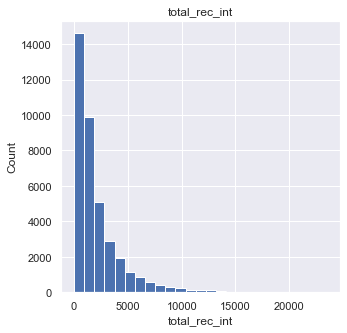

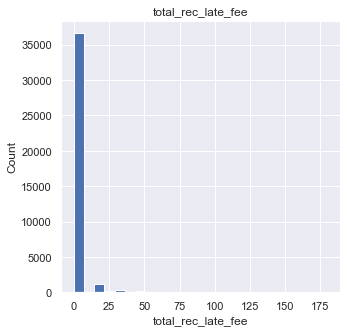

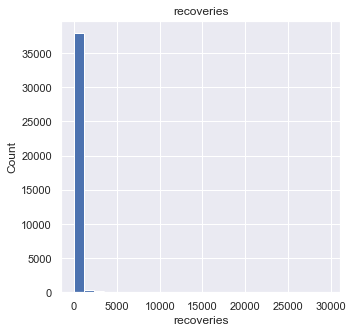

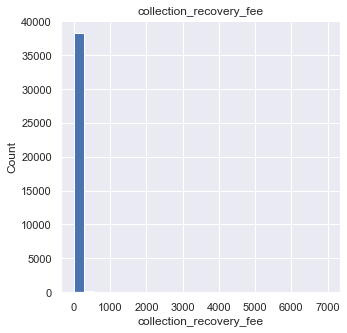

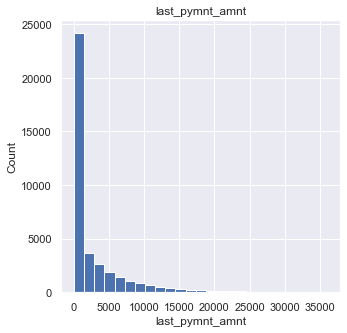

In [125]:
# In contionous variable we find the distribution of the variable
for feature in cont_feat:
    data=loan.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Lets check for discrete vars

In [129]:
loan[dis_feat].head()

,delinq_2yrs,inq_last_6mths,pub_rec,pub_rec_bankruptcies
0,0,1,0,0.0
1,0,5,0,0.0
2,0,2,0,0.0
3,0,1,0,0.0
5,0,3,0,0.0


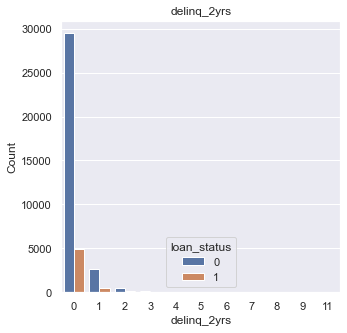

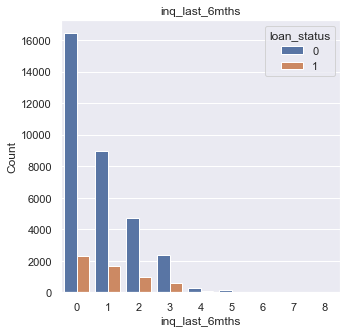

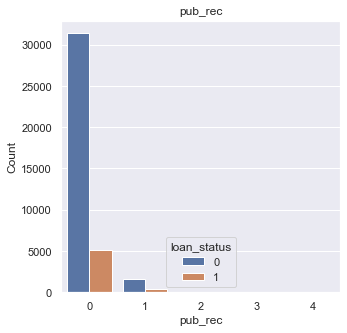

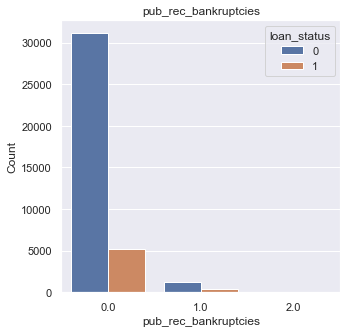

In [132]:
for i in dis_feat:
    df1=loan.copy()
    sns.countplot(x=i,hue="loan_status",data=loan)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()